In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | aksay
Processing Record 5 of Set 1 | panaba
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | turek
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | sungaipenuh
Processing Record 17 of Set 1 | hovd
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | hobart
Processing Record

Processing Record 39 of Set 4 | umm durman
City not found. Skipping...
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | saint-francois
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | lazaro cardenas
Processing Record 44 of Set 4 | beyneu
Processing Record 45 of Set 4 | nara
Processing Record 46 of Set 4 | berlevag
Processing Record 47 of Set 4 | ashqelon
Processing Record 48 of Set 4 | felanitx
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | salalah
Processing Record 1 of Set 5 | yulara
Processing Record 2 of Set 5 | sioux lookout
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | belleville
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | noumea
Processing Record 8 of Set 5 | tabory
Processing Record 9 of Set 5 | kloulklubed
Processing Record 10 of Set 5 | pechory
Processing Record 11 of Set 5 | mergui
City not found. Skipping...
Pr

Processing Record 27 of Set 8 | kamariotissa
Processing Record 28 of Set 8 | namie
Processing Record 29 of Set 8 | botwood
Processing Record 30 of Set 8 | teya
Processing Record 31 of Set 8 | srandakan
Processing Record 32 of Set 8 | chino valley
Processing Record 33 of Set 8 | klyuchi
Processing Record 34 of Set 8 | karwar
Processing Record 35 of Set 8 | rottingdean
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | geresk
City not found. Skipping...
Processing Record 38 of Set 8 | ierapetra
Processing Record 39 of Set 8 | den helder
Processing Record 40 of Set 8 | high rock
Processing Record 41 of Set 8 | galgani
City not found. Skipping...
Processing Record 42 of Set 8 | lukovetskiy
Processing Record 43 of Set 8 | te anau
Processing Record 44 of Set 8 | saint anthony
Processing Record 45 of Set 8 | vilhena
Processing Record 46 of Set 8 | kalemie
Processing Record 47 of Set 8 | boa vista
Processing Record 48 of Set 8 | katherine
Processing Record 49 of Set 8 | aca

Processing Record 13 of Set 12 | aksarka
Processing Record 14 of Set 12 | nelson bay
Processing Record 15 of Set 12 | teseney
Processing Record 16 of Set 12 | belpasso
Processing Record 17 of Set 12 | verkhnyaya inta
Processing Record 18 of Set 12 | colares
Processing Record 19 of Set 12 | lar
Processing Record 20 of Set 12 | dusetos
Processing Record 21 of Set 12 | irasan
Processing Record 22 of Set 12 | port-cartier
Processing Record 23 of Set 12 | ukiah
Processing Record 24 of Set 12 | cortes
Processing Record 25 of Set 12 | lagoa
Processing Record 26 of Set 12 | puerto el triunfo
Processing Record 27 of Set 12 | kuryk
Processing Record 28 of Set 12 | samana
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | port augusta
Processing Record 31 of Set 12 | luanda
Processing Record 32 of Set 12 | jieshi
Processing Record 33 of Set 12 | mahanje
Processing Record 34 of Set 12 | qingdao
Processing Record 35 of Set 12 | goderich
Processing Record 36 of Set 12 | pitimbu

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,55.71,58,35,9.78,NZ,2022-04-13 02:48:20
1,Constitucion,-35.3333,-72.4167,54.59,48,0,6.53,CL,2022-04-13 02:48:20
2,Grand Gaube,-20.0064,57.6608,77.38,85,21,5.99,MU,2022-04-13 02:48:20
3,Aksay,47.2600,39.8700,43.25,85,100,13.00,RU,2022-04-13 02:48:21
4,Panaba,21.2833,-88.2667,77.11,77,6,12.28,MX,2022-04-13 02:48:21
5,Lorengau,-2.0226,147.2712,84.94,69,6,7.14,PG,2022-04-13 02:48:21
6,Turek,52.0155,18.5005,34.61,66,13,8.08,PL,2022-04-13 02:48:22
7,Butaritari,3.0707,172.7902,81.90,76,74,14.23,KI,2022-04-13 02:48:22
8,Khatanga,71.9667,102.5000,12.15,84,100,12.28,RU,2022-04-13 02:48:22
9,Cape Town,-33.9258,18.4232,62.11,95,75,13.80,ZA,2022-04-13 02:46:24


In [11]:
#Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign df the new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-04-13 02:48:20,-46.6000,168.3333,55.71,58,35,9.78
1,Constitucion,CL,2022-04-13 02:48:20,-35.3333,-72.4167,54.59,48,0,6.53
2,Grand Gaube,MU,2022-04-13 02:48:20,-20.0064,57.6608,77.38,85,21,5.99
3,Aksay,RU,2022-04-13 02:48:21,47.2600,39.8700,43.25,85,100,13.00
4,Panaba,MX,2022-04-13 02:48:21,21.2833,-88.2667,77.11,77,6,12.28
5,Lorengau,PG,2022-04-13 02:48:21,-2.0226,147.2712,84.94,69,6,7.14
6,Turek,PL,2022-04-13 02:48:22,52.0155,18.5005,34.61,66,13,8.08
7,Butaritari,KI,2022-04-13 02:48:22,3.0707,172.7902,81.90,76,74,14.23
8,Khatanga,RU,2022-04-13 02:48:22,71.9667,102.5000,12.15,84,100,12.28
9,Cape Town,ZA,2022-04-13 02:46:24,-33.9258,18.4232,62.11,95,75,13.80


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

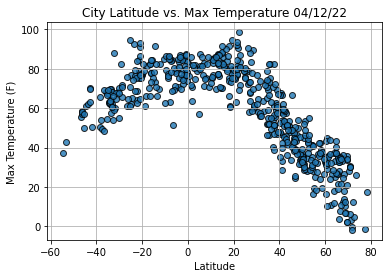

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

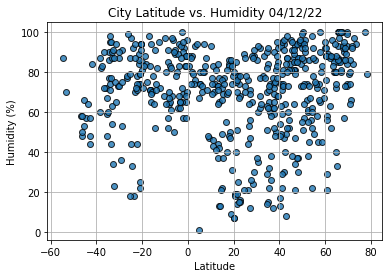

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

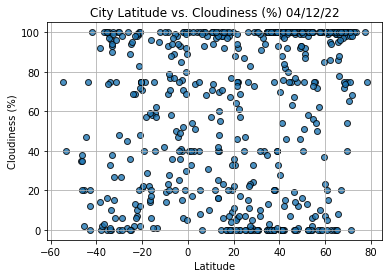

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

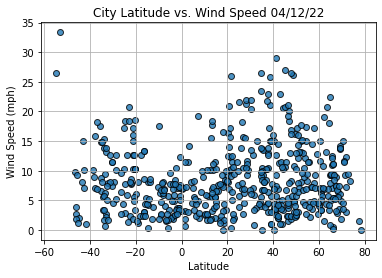

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()